In [ ]:
!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P ./data/
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P ./data/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
from scipy import stats

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

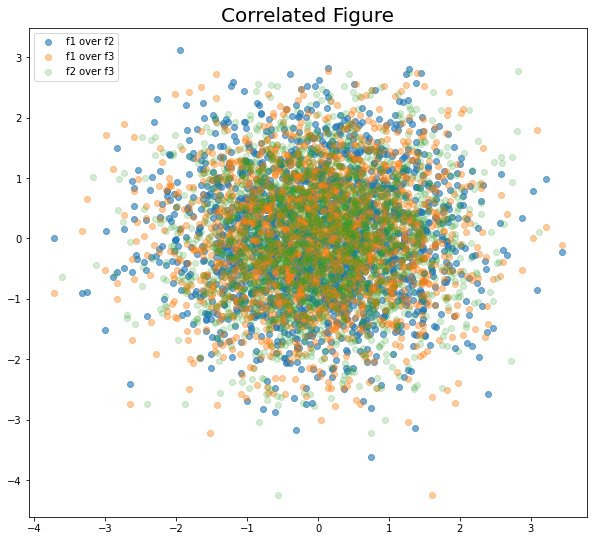

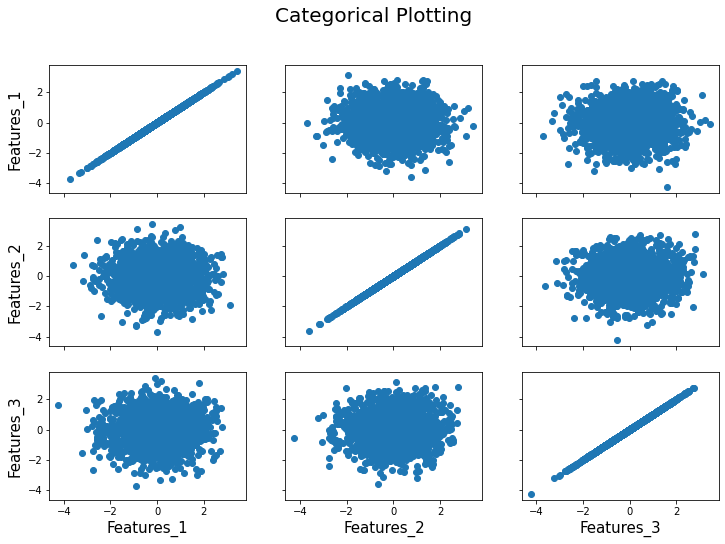

In [11]:
file_name = "./data/regression_generated.csv"
data1 = pd.read_csv(file_name)
data1

f1 = pd.Series(data=data1["features_1"])
f2 = pd.Series(data=data1["features_2"])
f3 = pd.Series(data=data1["features_3"])

plt.figure(figsize=(10,9))
plt.scatter(f1, f2, alpha=0.6)
plt.scatter(f1, f3, alpha=0.4)
#plt.scatter(f2, f1)
plt.scatter(f2, f3, alpha=0.2)
#plt.scatter(f3, f1)
#plt.scatter(f3, f2)
plt.title("Correlated Figure", fontsize=20)
plt.legend(["f1 over f2", "f1 over f3", "f2 over f3"])

plt.show()
print()

fig, axs = plt.subplots(3, 3, figsize=(12, 8), sharey=True, sharex=True)
axs[0][0].scatter(f1, f1)
axs[0][1].scatter(f1, f2)
axs[0][2].scatter(f1, f3)
axs[1][0].scatter(f2, f1)
axs[1][1].scatter(f2, f2)
axs[1][2].scatter(f2, f3)
axs[2][0].scatter(f3, f1)
axs[2][1].scatter(f3, f2)
axs[2][2].scatter(f3, f3)

fig.suptitle('Categorical Plotting', fontsize=20)
axs[0][0].set_ylabel("Features_1", fontsize=15)
axs[1][0].set_ylabel("Features_2", fontsize=15)
axs[2][0].set_ylabel("Features_3", fontsize=15)
axs[2][0].set_xlabel("Features_1", fontsize=15)
axs[2][1].set_xlabel("Features_2", fontsize=15)
axs[2][2].set_xlabel("Features_3", fontsize=15)

plt.show()

# We can say that the features are correlated as we can see from the categorical plotting
# and also observe from the first figure (Correlated), the features are most likely correlated with each other.
# the numbers are mostly in the middle, and thus the mean and std-dev values are close to each other. 

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [ ]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

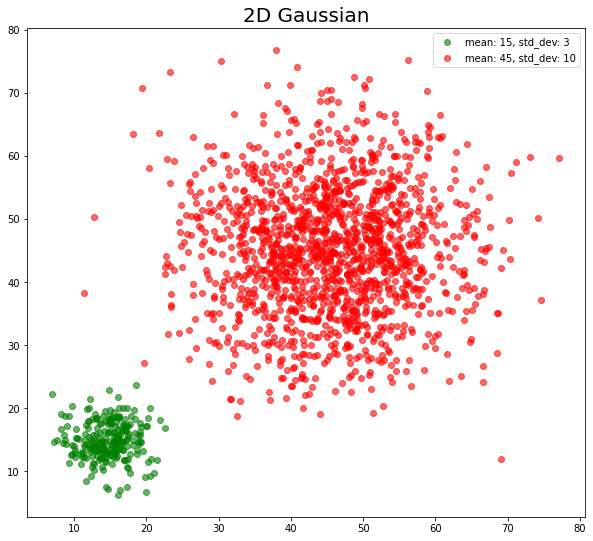

In [12]:
mean_1 = 15
std_dev_1 = 3
dataset_1 = np.array(mean_1 + std_dev_1 * np.random.randn(250, 250))
mean_2 = 45
std_dev_2 = 10
dataset_2 = np.array(mean_2 + std_dev_2 * np.random.randn(1500, 1500))

plt.figure(figsize = (10,9))
label1="mean: " + str(mean_1) + ", std_dev: " + str(std_dev_1)
label2="mean: " + str(mean_2) + ", std_dev: " + str(std_dev_2)
plt.scatter(x=dataset_1[:,1], y=dataset_1[:,0], alpha=0.6, c='g', label=label1)
plt.scatter(x=dataset_2[:,1], y=dataset_2[:,0], alpha=0.6, c='r', label=label2)
plt.title("2D Gaussian", fontsize=20)
plt.legend()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

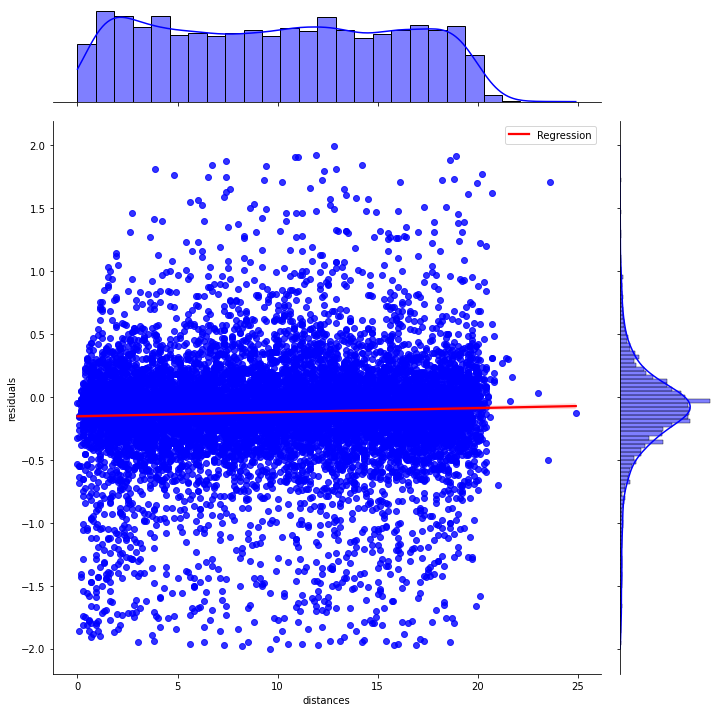

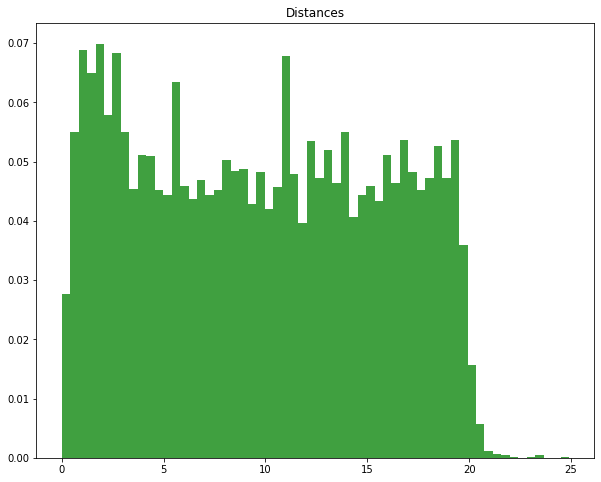

x:
 [ 0.2075  0.6225  1.0375  1.4525  1.8675  2.2825  2.6975  3.1125  3.5275
  3.9425  4.3575  4.7725  5.1875  5.6025  6.0175  6.4325  6.8475  7.2625
  7.6775  8.0925  8.5075  8.9225  9.3375  9.7525 10.1675 10.5825 10.9975
 11.4125 11.8275 12.2425 12.6575 13.0725 13.4875 13.9025 14.3175 14.7325
 15.1475 15.5625 15.9775 16.3925 16.8075 17.2225 17.6375 18.0525 18.4675
 18.8825 19.2975 19.7125 20.1275 20.5425 20.9575 21.3725 21.7875 22.2025
 22.6175 23.0325 23.4475 23.8625 24.2775 24.6925]

y:
 [-0.3008977072310533, -0.1919611586570114, -0.17323411255410767, -0.16372984991661965, -0.1314499582289099, -0.2001453634085242, -0.15298167239403362, -0.18499240558292412, -0.1427137922526596, -0.126014157014162, -0.17162081949057523, -0.10411007418042201, -0.14232547864505307, -0.13246547179756432, -0.12966973125883224, -0.10821144830989148, -0.08529690476189103, -0.09486758339699586, -0.06786710398444551, -0.08240743213173012, -0.12662852629202362, -0.08294172646227076, -0.05827880184332392, -0.

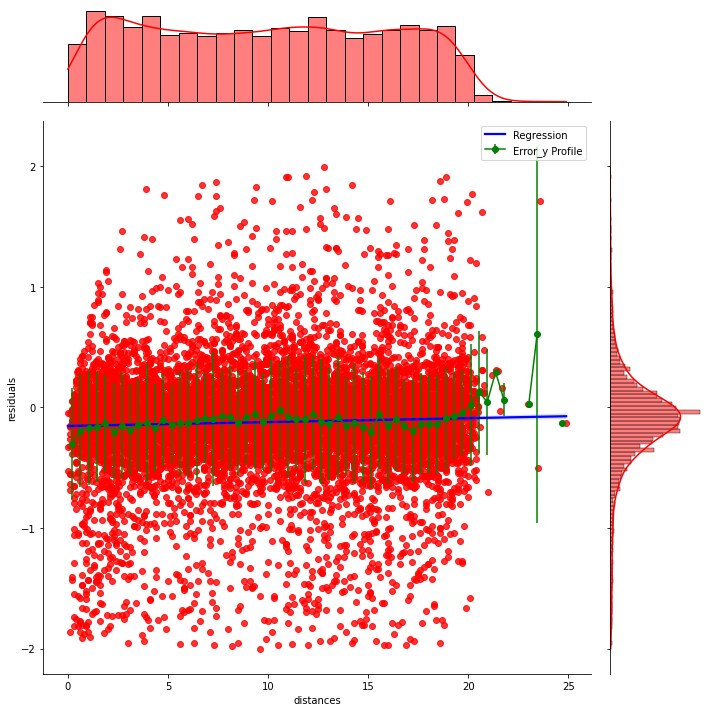

In [15]:
data_tmp = np.load('./data/residuals_261.pkl', allow_pickle=True).item()
df1 = pd.DataFrame(data_tmp) 
df2 = df1[abs(df1["residuals"])<2]
df2

sns.jointplot(data=df2, x="distances", y="residuals", kind="reg", color="b", height=10, 
              joint_kws={"line_kws":{"color":"r", "label":"Regression"}}).ax_joint.legend()
plt.show()
print()

plt.figure(figsize = (10,8))
(n, bins, patches) = plt.hist(df1["distances"], 60, density=True, facecolor="g", alpha=0.75)
plt.title("Distances")
plt.show()

x1=(bins[1:]+bins[:-1])/2
print("x:\n", x1)

y1 = [df2["residuals"][(df2["distances"] >=bins[i]) & (df2["distances"] <=bins[i+1])].mean() for i in range(len(n))]
print("\ny:\n", y1)

err_y = [df2["residuals"][(df2["distances"] >bins[i]) & (df2["distances"] <bins[i+1])].std() for i in range(len(n))]
print("\nerr_y:\n", err_y)

im2 = sns.jointplot(x="distances", y="residuals", data=df2, kind="reg", color="r", height = 10, 
                    joint_kws={"line_kws":{"color":"b", "label":"Regression"}})
plt.sca(im2.ax_joint)
plt.errorbar(x=x1, y=y1 , yerr=err_y, marker = "o", color = "g", xlolims=22, label="Error_y Profile") 
plt.legend()
plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


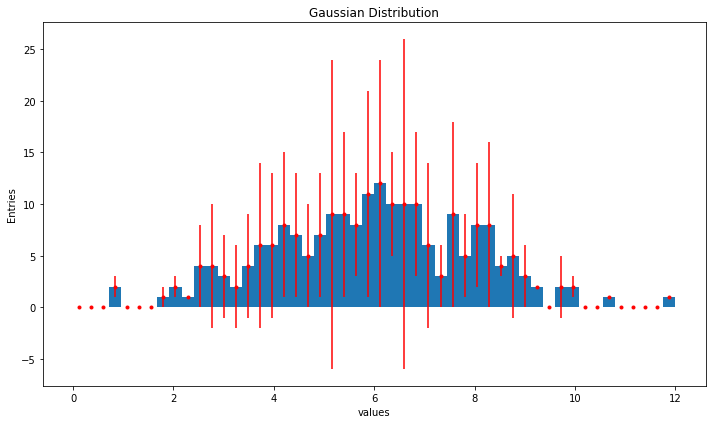

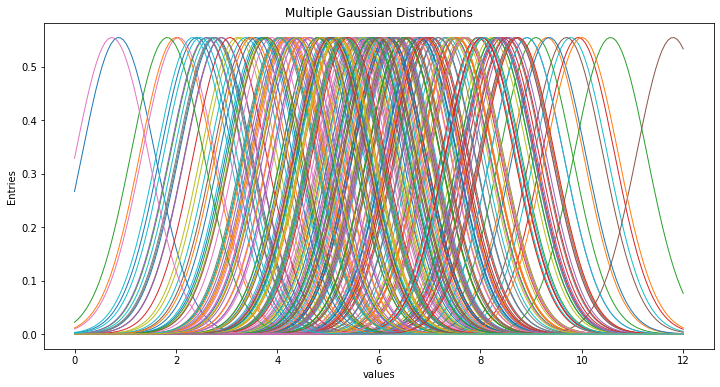

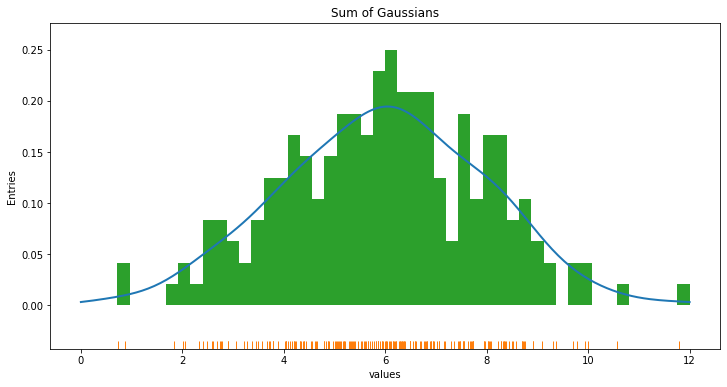

In [16]:
mean = 6
std = 2
n = 200
bins=50
r1=0
r2=12
x = np.random.normal(mean, std, n)

fig = plt.figure(figsize=(10, 6))
entries, edges, _ = plt.hist(x, bins=bins, range=(r1,r2))
bin_centers = 0.5 * (edges[:-1] + edges[1:])
plt.errorbar(bin_centers, entries, yerr=np.random.poisson(entries,bins), fmt='r.')
ax = fig.axes[0]
ax.set_title('Gaussian Distribution')
ax.set_xlabel('values')
ax.set_ylabel('Entries')
fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 6))

scale=1.06*scipy.stats.tstd(x)*(n)**(-0.2)
grid=np.linspace(r1, r2, n)
kernels=[]
for elem in x:
    kernel = scipy.stats.norm(elem, scale).pdf(grid)
    kernels.append(kernel)
    plt.plot(grid, kernel, lw=1)
gaussians=np.array(kernels)
ax = fig.axes[0]
ax.set_title('Multiple Gaussian Distributions')
ax.set_xlabel('values')
ax.set_ylabel('Entries')
plt.show()

fig = plt.figure(figsize=(12, 6))
density = np.sum(gaussians, axis=0)/scipy.integrate.trapz(np.sum(gaussians, axis=0), grid)
plt.plot(grid, density, lw=2)
_ = sns.rugplot(x)
plt.hist(x, bins=bins, density=True, range=(r1,r2))
ax = fig.axes[0]
ax.set_title('Sum of Gaussians')
ax.set_xlabel('values')
ax.set_ylabel('Entries')
plt.show()
